In [1]:
import numpy as np

f = np.load('mnist.npz')

x_train = f['x_train']
y_train = f['y_train']
x_test = f['x_test']
y_test = f['y_test']

In [2]:
X_TRAIN = np.reshape(x_train, (60000, 784)) / 255.
X_TEST = np.reshape(x_test, (10000, 784)) / 255.
Y_TRAIN = np.eye(10)[y_train]
Y_TEST = np.eye(10)[y_test]

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

x = Input(shape=(784,))
y = Dense(10, activation='softmax')(x)

neuralnet = Model(inputs=x, outputs=y)

neuralnet.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc'],
)

Using TensorFlow backend.


In [4]:
hist = neuralnet.fit(
    x = X_TRAIN,
    y = Y_TRAIN,
    epochs=30,
    validation_split=0.1,
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 2s - loss: 0.4914 - acc: 0.8721 - val_loss: 0.2703 - val_acc: 0.9262
Epoch 2/30
54000/54000 [==============================] - 2s - loss: 0.3145 - acc: 0.9127 - val_loss: 0.2413 - val_acc: 0.9353
Epoch 3/30
54000/54000 [==============================] - 2s - loss: 0.2914 - acc: 0.9184 - val_loss: 0.2350 - val_acc: 0.9365
Epoch 4/30
54000/54000 [==============================] - 2s - loss: 0.2806 - acc: 0.9219 - val_loss: 0.2299 - val_acc: 0.9395
Epoch 5/30
54000/54000 [==============================] - 2s - loss: 0.2733 - acc: 0.9236 - val_loss: 0.2278 - val_acc: 0.9378
Epoch 6/30
54000/54000 [==============================] - 2s - loss: 0.2691 - acc: 0.9254 - val_loss: 0.2259 - val_acc: 0.9390
Epoch 7/30
54000/54000 [==============================] - 2s - loss: 0.2640 - acc: 0.9264 - val_loss: 0.2242 - val_acc: 0.9378
Epoch 8/30
54000/54000 [==============================] - 2s -

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

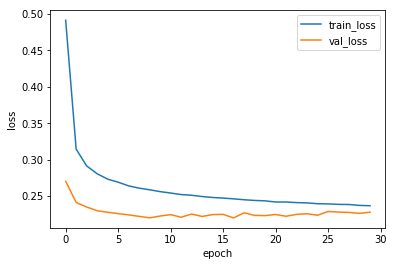

In [7]:
plt.plot(hist.epoch, hist.history['loss'], label='train_loss')
plt.plot(hist.epoch, hist.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

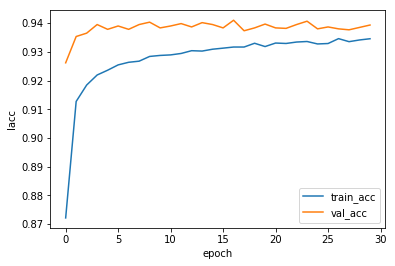

In [8]:
plt.plot(hist.epoch, hist.history['acc'], label='train_acc')
plt.plot(hist.epoch, hist.history['val_acc'], label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('lacc')

In [9]:
neuralnet.evaluate(x=X_TEST, y=Y_TEST)

 7680/10000 [======================>.......] - ETA: 0s

[0.27351756581664083, 0.9274]